# Module 1 Homework

#### In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [71]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1) Understanding Data-Driven Decisions data pulls

In [2]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=20
Period for indexes: 1954-04-20 to 2024-04-20 


### Question 1: [Macro] Average growth of GDP in 2023
#### What is the average growth (in %) of GDP in 2023?

In [5]:
# Real Gross Domestic Product (GDPC1), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [18]:
# Calculate yoy growth and qoq growth of gdpc1
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2022-10-01,21989.981,0.006517,0.006354
2023-01-01,22112.329,0.017179,0.005564
2023-04-01,22225.350,0.023825,0.005111
2023-07-01,22490.692,0.029269,0.011939
2023-10-01,22679.255,0.031345,0.008384


In [15]:
# Calculate average yoy of 2023
avg_yoy_2023 = np.average(gdpc1["gdpc1_us_yoy"].tail(4))

In [16]:
# Convert to 1 decimal point
np.round(avg_yoy_2023*100,1)

2.5

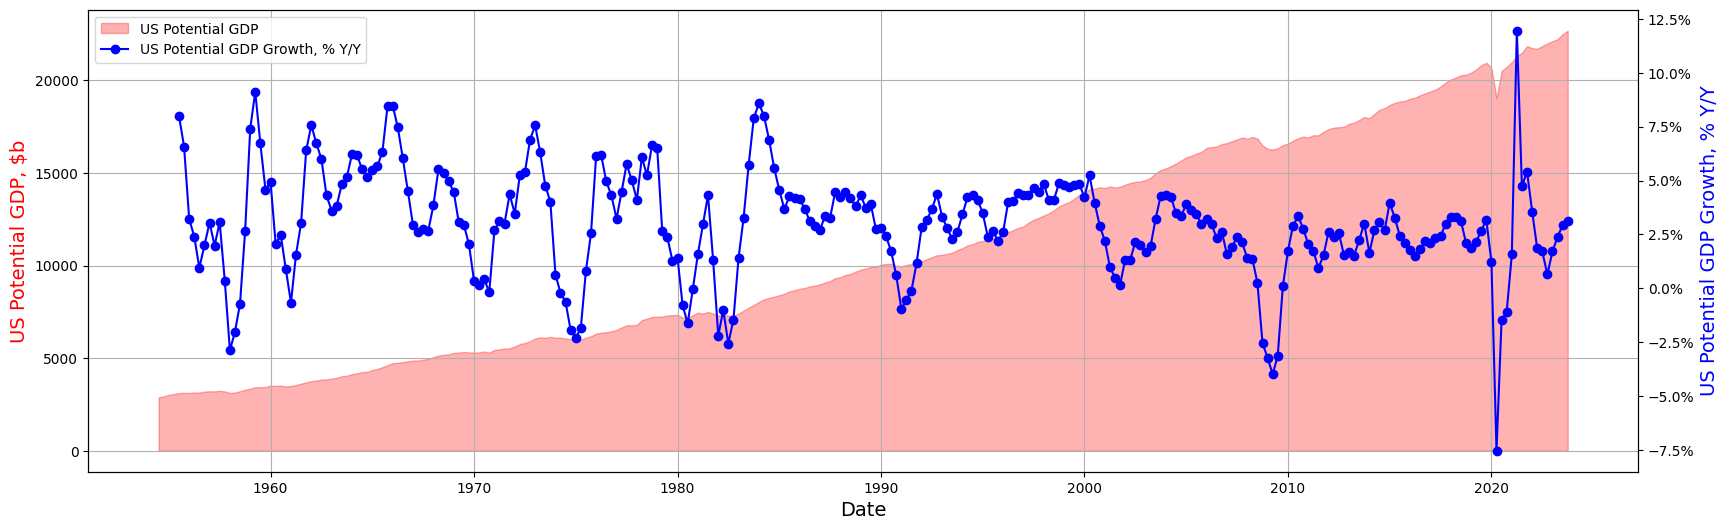

In [19]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdpc1.index, gdppot.GDPC1, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Question 2. [Macro] Inverse "Treasury Yield"
#### Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

In [57]:
# DGS2 and DGS10 interest rates
# https://fred.stlouisfed.org/series/DGS2
# https://fred.stlouisfed.org/series/DGS10
# DGS2 represents the 2-Year Treasury Constant Maturity rate.
# DGS10 represents the 10-Year Treasury Constant Maturity rate.
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10","fred",start=start)

In [58]:
dgs2.tail()

,DGS2
DATE,
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98


In [59]:
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [60]:
# Join the dataset
dgs2_10_joined = dgs2.join (dgs10, on="DATE", how="left")

In [61]:
# Add a new column for the difference of DGS10 & DGS2 daily
dgs2_10_joined['difference'] = dgs2_10_joined['DGS10'] - dgs2_10_joined['DGS2']

In [62]:
dgs2_10_joined.tail()

,DGS2,DGS10,difference
DATE,,,
2024-04-12,4.88,4.50,-0.38
2024-04-15,4.93,4.63,-0.30
2024-04-16,4.97,4.67,-0.30
2024-04-17,4.93,4.59,-0.34
2024-04-18,4.98,4.64,-0.34


In [64]:
# When retrieving data using pdr.DataReader from FRED (Federal Reserve Economic Data), the date index is typically set automatically. 
# To access the date index, use the index attribute of the DataFrame.
dgs2_10_joined.reset_index(inplace=True)

In [66]:
dgs2_10_joined.tail()

,DATE,DGS2,DGS10,difference
12488,2024-04-12,4.88,4.50,-0.38
12489,2024-04-15,4.93,4.63,-0.30
12490,2024-04-16,4.97,4.67,-0.30
12491,2024-04-17,4.93,4.59,-0.34
12492,2024-04-18,4.98,4.64,-0.34


In [53]:
# Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01)
np.round(np.min(dgs2_10_joined[dgs2_10_joined['DATE'] > '2000-01-01']['difference']),1)

-1.1

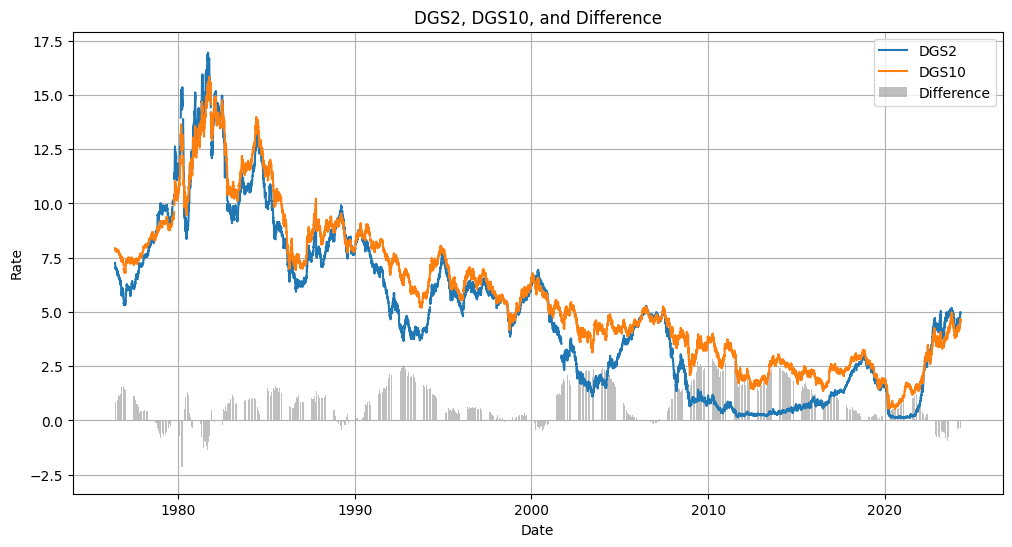

In [69]:
# Plotting
plt.figure(figsize=(12, 6))

# Line plot for DGS2 and DGS10
plt.plot(dgs2_10_joined['DATE'],dgs2_10_joined['DGS2'], label='DGS2')
plt.plot(dgs2_10_joined['DATE'],dgs2_10_joined['DGS10'], label='DGS10')

# Bar plot for the difference
plt.bar(dgs2_10_joined['DATE'], dgs2_10_joined['difference'], color='grey', alpha=0.5, label='Difference')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('DGS2, DGS10, and Difference')
plt.legend()
plt.grid(True)
plt.show()

#### What does the "inverted yield curve" mean for the market and investors
Inverted yield curve happenes when the yields on short term bonds are higher than long term bond. Normally it is seen as warning sign of economic downturn

#### Do you think it can be a good predictive feature for the models
Yes, people tend to buy shorter bond during economic downturn

## Question 3. [Index] Which Index is better recently?
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

In [168]:
# INDEXES from Yahoo Finance 
# WEB: https://finance.yahoo.com/quote/%5EGSPC/)
#  IPC Mexico
snp500 = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")
ipc_mexico = yf.download(tickers = "^MXX",
                         period = "max",
                         interval = "1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [75]:
snp500.reset_index(inplace=True)
snp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
24186,2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000
24187,2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
24188,2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
24189,2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
24190,2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000


In [76]:
ipc_mexico.reset_index(inplace=True)
ipc_mexico.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8119,2024-04-15,56536.468750,56709.121094,55924.101562,55984.000000,55984.000000,170645700
8120,2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900
8121,2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900
8122,2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900
8123,2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600


In [77]:
# normally 252 trading days
snp500['adj_close_last_year'] = snp500['Adj Close'].shift(252)
snp500['yoy_growth'] = snp500['Adj Close'] / snp500['adj_close_last_year'] -1
ipc_mexico['adj_close_last_year'] = ipc_mexico['Adj Close'].shift(252)
ipc_mexico['yoy_growth'] = ipc_mexico['Adj Close'] / ipc_mexico['adj_close_last_year'] -1

In [79]:
snp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
24186,2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000,4146.220215,0.220828
24187,2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000,4137.640137,0.220843
24188,2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000,4151.319824,0.209786
24189,2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000,4154.870117,0.206083
24190,2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000,4154.520020,0.195621


In [81]:
ipc_mexico.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
8119,2024-04-15,56536.468750,56709.121094,55924.101562,55984.000000,55984.000000,170645700,54695.781250,0.023552
8120,2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900,54460.058594,0.024554
8121,2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900,54778.929688,0.011624
8122,2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900,54385.519531,0.024895
8123,2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600,54308.089844,0.028629


In [99]:
snp500_5y = snp500[(snp500['Date'] >= '2019-04-09') & (snp500['Date'] <= '2024-04-09')]
ipc_mexico_5y = ipc_mexico[(ipc_mexico['Date'] >= '2019-04-09') & (ipc_mexico['Date']  <=  '2024-04-09')]

In [100]:
snp500_5y.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
24178,2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,4109.310059,0.268215
24179,2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000,4124.509766,0.247957
24180,2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000,4100.600098,0.269165
24181,2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000,4090.379883,0.271860
24182,2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000,4105.020020,0.269156


In [101]:
ipc_mexico_5y.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
8111,2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300,54198.941406,0.060969
8112,2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700,53904.000000,0.073812
8113,2024-04-05,57805.191406,58227.839844,57678.609375,58092.441406,58092.441406,212252300,53896.351562,0.077855
8114,2024-04-08,58021.660156,58192.320312,57749.441406,57989.941406,57989.941406,154641800,54176.011719,0.070399
8115,2024-04-09,58010.371094,58298.769531,57492.058594,57571.148438,57571.148438,202213300,53498.390625,0.076129


In [106]:
# Calculate 5 year growth rate for ipc_mexico
initial_value = ipc_mexico_5y.iloc[0]['Adj Close']  # Initial value at 2019-04-09
final_value = ipc_mexico_5y.iloc[-1]['Adj Close']   # Final value at 2024-04-09

# Calculate the CAGR
years = 5
cagr = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 5-year CAGR is: {cagr:.2%}")

The 5-year CAGR is: 4.98%


In [107]:
# Calculate 5 year growth rate for snp_500
initial_value = snp500_5y.iloc[0]['Adj Close']  # Initial value at 2019-04-09
final_value = snp500_5y.iloc[-1]['Adj Close']   # Final value at 2024-04-09

# Calculate the CAGR
years = 5
cagr = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 5-year CAGR is: {cagr:.2%}")

The 5-year CAGR is: 12.60%


Apparently, S&P500 has a better 5 years growth rate of 12.6%

#### Additional: think of other indexes and try to download stats and compare the growth? 

In [112]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGSPC/)
#  IPC Mexico
dji = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d") 

[*********************100%%**********************]  1 of 1 completed


In [114]:
# normally 252 trading days
dji.reset_index(inplace=True)
dji['adj_close_last_year'] = dji['Adj Close'].shift(252)
dji['yoy_growth'] = dji['Adj Close'] / dji['adj_close_last_year'] -1

In [115]:
dji.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
8130,2024-04-15,38075.378906,38386.808594,37657.789062,37735.109375,37735.109375,389170000,34029.691406,0.108888
8131,2024-04-16,37992.218750,37992.218750,37713.699219,37798.968750,37798.968750,339480000,33886.468750,0.115459
8132,2024-04-17,37949.671875,38036.699219,37611.558594,37753.308594,37753.308594,314650000,33987.179688,0.110810
8133,2024-04-18,37847.210938,38083.761719,37681.519531,37775.378906,37775.378906,300230000,33976.628906,0.111805
8134,2024-04-19,37801.980469,38102.570312,37781.609375,37986.398438,37986.398438,420460000,33897.011719,0.120642


### Calculate 5 years growth rate

CAGR = ((Final Value / Initial Value) ^ (1 / Number of Years)) - 1


In [137]:
# Calculate 5 year growth rate for ipc_mexico
initial_value = ipc_mexico[ipc_mexico['Date']=='2019-04-09']['Adj Close'].values[0]  # Initial value at 2019-04-09
final_value = ipc_mexico[ipc_mexico['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'ipc_mexico'
years = 5
cagr_ipc_mexico_5y = ((final_value / initial_value) ** (1 / years)) - 1
 
print(f"The 5-year CAGR for {index} is: {cagr_ipc_mexico_5y:.2%}")

The 5-year CAGR for ipc_mexico is: 4.98%


In [138]:
# Calculate 5 year growth rate for snp_500
initial_value = snp500[snp500['Date']=='2019-04-09']['Adj Close'].values[0]  # Initial value at 2019-04-09
final_value = snp500[snp500['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'snp_500'
years = 5
cagr_snp_500_5y = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 5-year CAGR for {index} is: {cagr_snp_500_5y:.2%}")

The 5-year CAGR for snp_500 is: 12.60%


In [162]:
# Calculate 5 year growth rate for dji
initial_value = dji[dji['Date']=='2019-04-09']['Adj Close'].values[0]  # Initial value at 2019-04-09
final_value = dji[dji['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'dji'
years = 5
cagr_dji_5y = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 5-year CAGR for {index} is: {cagr_dji_5y:.2%}")

The 5-year CAGR for dji is: 8.26%


#### 10 Years Growth Rate

In [157]:
# Calculate 10 year growth rate for ipc_mexico
initial_value = ipc_mexico[ipc_mexico['Date']=='2014-04-09']['Adj Close'].values[0]  # Initial value at 2014-04-09
final_value = ipc_mexico[ipc_mexico['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'ipc_mexico'
years = 10
cagr_ipc_mexico_10y = ((final_value / initial_value) ** (1 / years)) - 1
 
print(f"The 10-year CAGR for {index} is: {cagr_ipc_mexico_10y:.2%}")

The 10-year CAGR for ipc_mexico is: 3.47%


In [143]:
# Calculate 10 year growth rate for snp_500
initial_value = snp500[snp500['Date']=='2014-04-09']['Adj Close'].values[0]  # Initial value at 2014-04-09
final_value = snp500[snp500['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'snp_500'
years = 10
cagr_snp_500_10y = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 10-year CAGR for {index} is: {cagr_snp_500_10y:.2%}")

The 10-year CAGR for snp_500 is: 10.78%


In [161]:
# Calculate 10 year growth rate for dji
initial_value = dji[dji['Date']=='2014-04-09']['Adj Close'].values[0]  # Initial value at 2014-04-09
final_value = dji[dji['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'dji'
years = 10
cagr_dji_10y = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 10-year CAGR for {index} is: {cagr_dji_10y:.2%}")

The 10-year CAGR for dji is: 8.99%


#### 20 Years Growth Rate

In [167]:
# Calculate 20 year growth rate for ipc_mexico
# No record for 2004-04-09, use the nearest trading day
initial_value = ipc_mexico[ipc_mexico['Date']=='2004-04-07']['Adj Close'].values[0]  # Initial value at 2004-04-07
final_value = ipc_mexico[ipc_mexico['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'ipc_mexico'
years = 20
cagr_ipc_mexico_20y = ((final_value / initial_value) ** (1 / years)) - 1
 
print(f"The 20-year CAGR for {index} is: {cagr_ipc_mexico_20y:.2%}")

The 20-year CAGR for ipc_mexico is: 8.75%


In [165]:
# Calculate 20 year growth rate for snp_500
# No record for 2004-04-09, use the nearest trading day
initial_value = snp500[snp500['Date']=='2004-04-08']['Adj Close'].values[0]  # Initial value at 2004-04-08
final_value = snp500[snp500['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'snp_500'
years = 20
cagr_snp_500_20y = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 20-year CAGR for {index} is: {cagr_snp_500_20y:.2%}")

The 20-year CAGR for snp_500 is: 7.90%


In [166]:
# Calculate 10 year growth rate for dji
# No record for 2004-04-09, use the nearest trading day
initial_value = dji[dji['Date']=='2004-04-08']['Adj Close'].values[0]  # Initial value at 2014-04-08
final_value = dji[dji['Date']=='2024-04-09']['Adj Close'].values[0]     # Final value at 2024-04-09

# Calculate the CAGR
index = 'dji'
years = 20
cagr_dji_20y = ((final_value / initial_value) ** (1 / years)) - 1

print(f"The 20-year CAGR for {index} is: {cagr_dji_20y:.2%}")

The 20-year CAGR for dji is: 6.79%


The stock index that being chose are IPC Mexico, S&P 500 and DJI. Below list down the CAGR for these stocks, for 5 years, 10 years and 20 years.
<br/><br/>
5 Years CAGR 
<br/> 
The 5-year CAGR for ipc_mexico is: 4.98%
<br/> 
The 5-year CAGR for snp_500 is: 12.60%
<br/> 
The 5-year CAGR for dji is: 8.26%
<br/><br/> 
10 Years CAGR
<br/> 
The 10-year CAGR for ipc_mexico is: 3.47%
<br/> 
The 10-year CAGR for snp_500 is: 10.78%
<br/> 
The 10-year CAGR for dji is: 8.99% 
<br/><br/>
20 Years CAGR
<br/> 
The 20-year CAGR for ipc_mexico is: 8.75%
<br/> 
The 20-year CAGR for snp_500 is: 7.90%
<br/> 
The 20-year CAGR for dji is: 6.79% 
<br/><br/>
It seems like S&P 500 has better CAGR

#### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

In [181]:
# INDEXES from Yahoo Finance 
# WEB: https://finance.yahoo.com/quote/%5EGSPC/)
# Download 6 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM index from yahoo finance

sr = yf.download(tickers = "2222.SR",
                     period = "max",
                     interval = "1d")
brkb = yf.download(tickers = "BRK-B",
                     period = "max",
                     interval = "1d") 
aapl = yf.download(tickers = "AAPL",
                     period = "max",
                     interval = "1d") 
msft = yf.download(tickers = "MSFT",
                     period = "max",
                     interval = "1d") 
goog = yf.download(tickers = "GOOG",
                     period = "max",
                     interval = "1d") 
jpm = yf.download(tickers = "JPM",
                     period = "max",
                     interval = "1d") 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [190]:
# Reset index to get date
sr.reset_index(inplace=True)
brkb.reset_index(inplace=True)
aapl.reset_index(inplace=True)
msft.reset_index(inplace=True)
goog.reset_index(inplace=True)
jpm.reset_index(inplace=True)

In [191]:
# Get data for each index for year 2023 only
sr_2023 = sr[sr['Date'].dt.year==2023] 
brkb_2023 = brkb[brkb['Date'].dt.year==2023] 
aapl_2023 = aapl[aapl['Date'].dt.year==2023] 
msft_2023 = msft[msft['Date'].dt.year==2023] 
goog_2023 = goog[goog['Date'].dt.year==2023] 
jpm_2023 = jpm[jpm['Date'].dt.year==2023]  

In [192]:
sr_2023

,index,Date,Open,High,Low,Close,Adj Close,Volume
764,764,2023-01-01,29.227272,29.454544,29.181818,29.454544,28.475794,1569087
765,765,2023-01-02,29.545454,29.545454,29.227272,29.227272,28.256073,4693364
766,766,2023-01-03,29.227272,29.227272,29.227272,29.227272,28.256073,0
767,767,2023-01-04,29.181818,29.227272,28.681818,28.818180,27.860577,4618455
768,768,2023-01-05,28.818180,28.818180,28.363636,28.681818,27.728745,4797670
...,...,...,...,...,...,...,...,...
1008,1008,2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070
1009,1009,2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967
1010,1010,2023-12-27,33.099998,33.250000,33.000000,33.150002,32.977268,14815683
1011,1011,2023-12-28,33.150002,33.250000,32.950001,33.049999,32.877789,12720450


In [196]:
# Get maximum-minimim "Adj.Close" price for each stock
sr_2023_minmax_adj = ( (sr_2023['Adj Close'].max()) - (sr_2023['Adj Close'].min())) / (sr_2023['Adj Close'].max())
brkb_2023_minmax_adj = ( (brkb_2023['Adj Close'].max()) - (brkb_2023['Adj Close'].min())) / (brkb_2023['Adj Close'].max())
aapl_2023_minmax_adj = ( (aapl_2023['Adj Close'].max()) - (aapl_2023['Adj Close'].min())) / (aapl_2023['Adj Close'].max())
msft_2023_minmax_adj = ( (msft_2023['Adj Close'].max()) - (msft_2023['Adj Close'].min())) / (msft_2023['Adj Close'].max())
goog_2023_minmax_adj = ( (goog_2023['Adj Close'].max()) - (goog_2023['Adj Close'].min())) / (goog_2023['Adj Close'].max())
jpm_2023_minmax_adj = ( (jpm_2023['Adj Close'].max()) - (jpm_2023['Adj Close'].min())) / (jpm_2023['Adj Close'].max())

In [201]:

print(f"The maximum-minimim Adj.Close price for Saudi Arabian Oil Company is: {sr_2023_minmax_adj:.2}")
print(f"The maximum-minimim Adj.Close price for Berkshire Hathaway Inc Class B Company is: {brkb_2023_minmax_adj:.2}")
print(f"The maximum-minimim Adj.Close price for Apple is: {aapl_2023_minmax_adj:.2}")
print(f"The maximum-minimim Adj.Close price for Microsoft is: {msft_2023_minmax_adj:.2}")
print(f"The maximum-minimim Adj.Close price for Google is: {goog_2023_minmax_adj:.2}")
print(f"The maximum-minimim Adj.Close price for J.P. Morgan Company is: {jpm_2023_minmax_adj:.2}")
max_adj = max(sr_2023_minmax_adj, brkb_2023_minmax_adj, aapl_2023_minmax_adj, msft_2023_minmax_adj, goog_2023_minmax_adj, jpm_2023_minmax_adj)
print(f"The maximum maximum-minimim Adj.Close price for the 6 stocks is: {max_adj:.2}")

The maximum-minimim Adj.Close price for Saudi Arabian Oil Company is: 0.21
The maximum-minimim Adj.Close price for Berkshire Hathaway Inc Class B Company is: 0.21
The maximum-minimim Adj.Close price for Apple is: 0.37
The maximum-minimim Adj.Close price for Microsoft is: 0.42
The maximum-minimim Adj.Close price for Google is: 0.39
The maximum-minimim Adj.Close price for J.P. Morgan Company is: 0.28
The maximum maximum-minimim Adj.Close price for the 6 stocks is: 0.42


In [207]:
# Assuming you have a dictionary 'stocks_dict' mapping stock symbols to their respective maximum-minimum Adj. Close prices
stocks_dict = {
    'sr_2023_minmax_adj': sr_2023_minmax_adj,
    'brkb_2023_minmax_adj': brkb_2023_minmax_adj,
    'aapl_2023_minmax_adj': aapl_2023_minmax_adj,
    'msft_2023_minmax_adj': msft_2023_minmax_adj,
    'goog_2023_minmax_adj': goog_2023_minmax_adj,
    'jpm_2023_minmax_adj': jpm_2023_minmax_adj
}

# Find the stock symbol with the maximum maximum-minimum Adj. Close price
max_stock, max_value = max(stocks_dict.items(), key=lambda x: x[1])

# Print the result
print(f"The stock with the maximum maximum-minimum Adj. Close price is: {max_stock} with value of {max_value:.2f}")

The stock with the maximum maximum-minimum Adj. Close price is: msft_2023_minmax_adj with value of 0.42


#### Why this may be important for your research?
The calculation provide insights into the volatility and price variation of each stock relative to its maximum value. 
<br/>
Stock with higher ratio may be considered more volatile or have experienced greater price fluctuation compared to stock with lower ratio

### Question 5. [Stocks] Dividend Yield
Find the largest dividend yield for the same set of stocks

In [260]:
import pandas as pd
import yfinance as yf

# List of stock symbols
stocks = ['SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Create a dictionary to store dividends for each stock
dividends_dict = {}

# Iterate over each stock symbol
for stock_symbol in stocks:
    # Download stock data
    stock_data = yf.Ticker(stock_symbol)

    # Get dividends for 2023
    dividends_2023 = stock_data.dividends.loc['2023-01-01':'2023-12-31']

    # Sum up dividends and store in the dictionary
    dividends_sum = dividends_2023.sum()
    dividends_dict[stock_symbol] = dividends_sum

# Convert the dictionary to a DataFrame for easier viewing
df_dividends = pd.DataFrame(list(dividends_dict.items()), columns=['Stock', 'Dividends'])

# Print the DataFrame
print(df_dividends)


   Stock  Dividends
0     SR      2.915
1  BRK-B      0.000
2   AAPL      0.950
3   MSFT      2.790
4   GOOG      0.000
5    JPM      4.050


In [282]:
# Assuming you have a list of DataFrame names
dataframes = {
    'SR': sr_2023,
    'BRK-B': brkb_2023,
    'AAPL': aapl_2023,
    'MSFT': msft_2023,
    'GOOG': goog_2023,
    'JPM': jpm_2023
}
 

# List of stock symbols
stocks = ['SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Create a dictionary to store dividends for each stock
dividends_dict = {}

# Iterate over each stock symbol
for stock_symbol in stocks:
    # Download stock data
    stock_data = yf.Ticker(stock_symbol)

    # Get dividends for 2023
    dividends_2023 = stock_data.dividends.loc['2023-01-01':'2023-12-31']

    # Sum up dividends and store in the dictionary
    dividends_sum = dividends_2023.sum()
    dividends_dict[stock_symbol] = dividends_sum

# Convert the dictionary to a DataFrame for easier viewing
df_dividends = pd.DataFrame(list(dividends_dict.items()), columns=['Stock', 'Dividends'])

# Print the DataFrame
print(df_dividends)



   Stock  Dividends
0     SR      2.915
1  BRK-B      0.000
2   AAPL      0.950
3   MSFT      2.790
4   GOOG      0.000
5    JPM      4.050


In [302]:
for stock_symbol, df in dataframes.items():
    dividen = df_dividends[df_dividends['Stock'] == stock_symbol]['Dividends'].values[0] 
    print(f"Dividends for {stock_symbol} in 2023:", df_dividends[df_dividends['Stock'] == stock_symbol]['Dividends'].values[0] )
    last_day_adj_close = df.tail(1)['Adj Close'].values[0]
    print(f"Last day ADJ close {stock_symbol} in 2023:", df.tail(1)['Adj Close'].values[0])
    div_yield = (dividen/last_day_adj_close) *100
    print(f"Dividend Yield {stock_symbol} in 2023:  {div_yield:.2f}")
    print("")


Dividends for SR in 2023: 2.915
Last day ADJ close SR in 2023: 32.82804870605469
Dividend Yield SR in 2023:  8.88

Dividends for BRK-B in 2023: 0.0
Last day ADJ close BRK-B in 2023: 356.6600036621094
Dividend Yield BRK-B in 2023:  0.00

Dividends for AAPL in 2023: 0.95
Last day ADJ close AAPL in 2023: 192.28463745117188
Dividend Yield AAPL in 2023:  0.49

Dividends for MSFT in 2023: 2.79
Last day ADJ close MSFT in 2023: 375.34588623046875
Dividend Yield MSFT in 2023:  0.74

Dividends for GOOG in 2023: 0.0
Last day ADJ close GOOG in 2023: 140.92999267578125
Dividend Yield GOOG in 2023:  0.00

Dividends for JPM in 2023: 4.05
Last day ADJ close JPM in 2023: 168.07713317871094
Dividend Yield JPM in 2023:  2.41



### Question 6. [Exploratory] Investigate new metrics
Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

In [306]:
nasdaq = yf.download(tickers = "^IXIC",
                     period = "max",
                     interval = "1d") 
vix = yf.download(tickers = "^VIX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


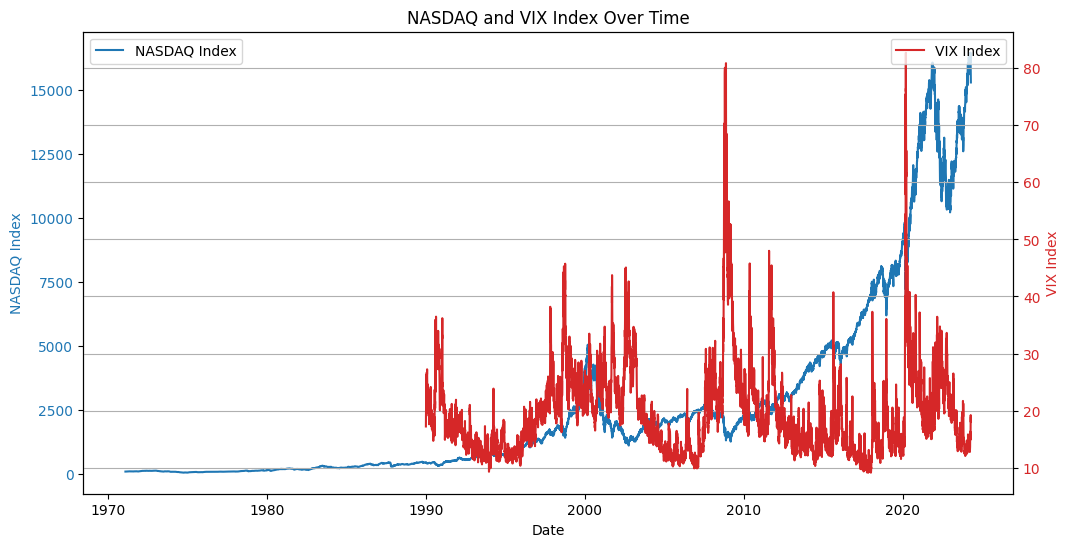

In [309]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NASDAQ index on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('NASDAQ Index', color=color)
ax1.plot(nasdaq['Close'], color=color, label='NASDAQ Index')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a secondary y-axis for VIX index
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('VIX Index', color=color)
ax2.plot(vix['Close'], color=color, label='VIX Index')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Show plot
plt.title('NASDAQ and VIX Index Over Time')
plt.grid(True)
plt.show()

NASDAQ - 
NASDAQ is a stock exchange based in the United States, known for being one of the world's first electronic stock exchanges.This index can provide insights into overall market trends and sentiment, which can be valuable for understanding the broader market contex.
<br/>
VIX - Volatility Index (VIX) also known as the "fear index," measures market volatility and investor sentiment. Monitoring the VIX can help you gauge market risk and sentiment, which can be valuable for adjusting your investment strategy..

### Question 7. [Exploratory] Time-driven strategy description around earnings releases
Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

- Select company with positive EPS